In [1]:
using Distributions
using StatsPlots
default(fmt=:png)
using Random

In [2]:
function biased_var_vs_unbiased_var(; dist = Normal(), n = 10, L = 1000,
        loss_func = (x, v) -> (x - v)^2)
    σ² = var(dist)
    Loss_biased = Vector{Float64}(undef, L)
    Loss_unbiased = Vector{Float64}(undef, L)
    tmp = [Vector{Float64}(undef, n) for _ in 1:Threads.nthreads()]
    Threads.@threads for i in 1:L
        sample = rand!(dist, tmp[Threads.threadid()])
        b = var(sample; corrected=false) # biased var
        u = var(sample; corrected=true)  # unbiased var
        Loss_biased[i] = loss_func(b, σ²)
        Loss_unbiased[i] = loss_func(u, σ²)
    end
    Loss_biased, Loss_unbiased
end

function plot_score(; dist = Normal(), n = 10, L = 10^4,
        loss_func = (x, v) -> (x - v)^2,
        bin = 100)
    Loss_biased, Loss_unbiased = biased_var_vs_unbiased_var(; dist, n, L, loss_func)
    Score = Loss_unbiased - Loss_biased
    @show mean(Score) std(Score)
    P1 = plot(cumsum(Score); label="total score", legend=:outertop)
    P2 = histogram(Score; alpha=0.3, label="score", legend=:outertop, bin)
    vline!([0]; label="", c=:red)
    plot(P1, P2; size=(800, 300))
end

Random.seed!(4649373)

TaskLocalRNG()

mean(Score) = 0.01371993776713453
std(Score) = 0.10633855282733227


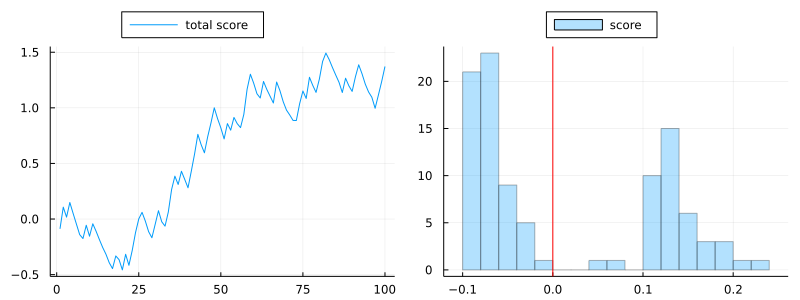

In [3]:
plot_score(; loss_func = (x, v) -> abs(x - v), L = 100, bin = 20)

mean(Score) = 0.014139002992519186
std(Score) = 0.10590131822797655


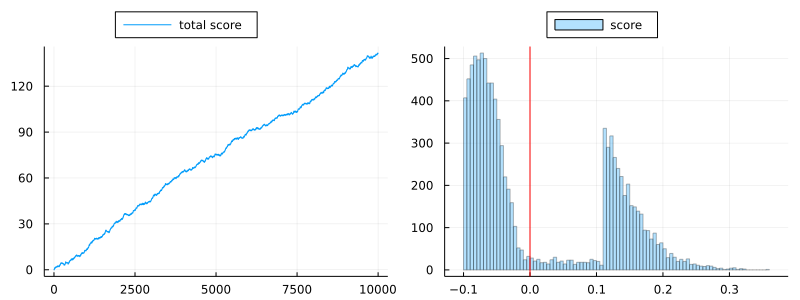

In [4]:
plot_score(; loss_func = (x, v) -> abs(x - v))

mean(Score) = 0.025613678006661256
std(Score) = 0.11429213364894529


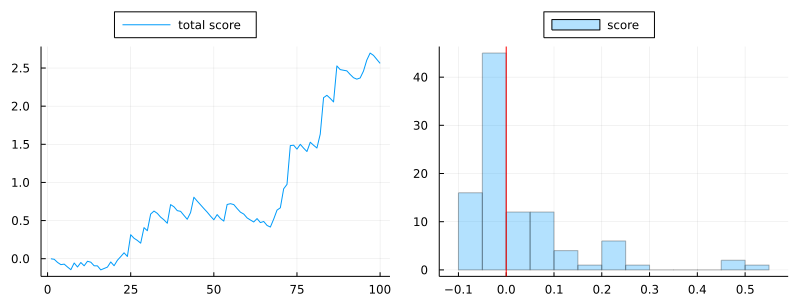

In [5]:
plot_score(; loss_func = (x, v) -> (x - v)^2, L = 100, bin = 20)

mean(Score) = 0.033755058830330836
std(Score) = 0.13854657499295311


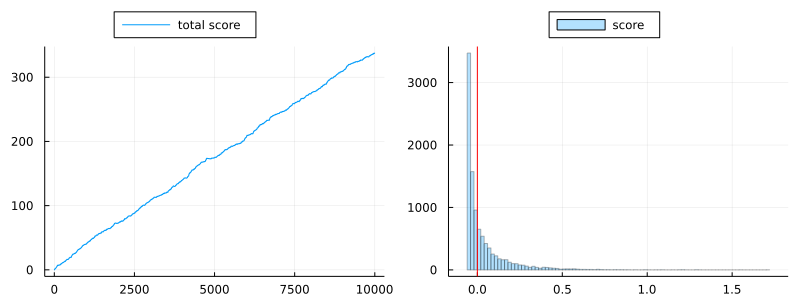

In [6]:
plot_score(; loss_func = (x, v) -> (x - v)^2)

mean(Score) = -0.001630935120739963
std(Score) = 0.049576580269595834


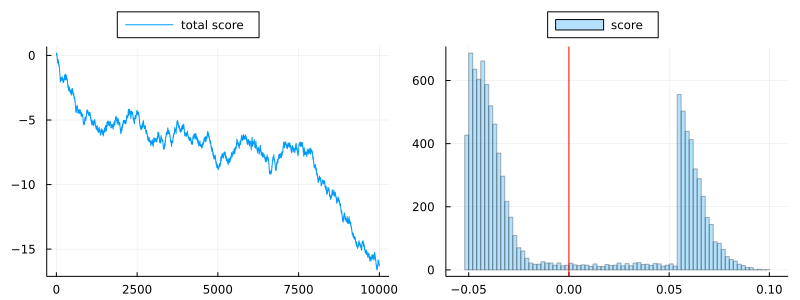

In [7]:
plot_score(; loss_func = (x, v) -> abs(√x - √v))

mean(Score) = 8.387160268140597e-5
std(Score) = 0.024224777608726565


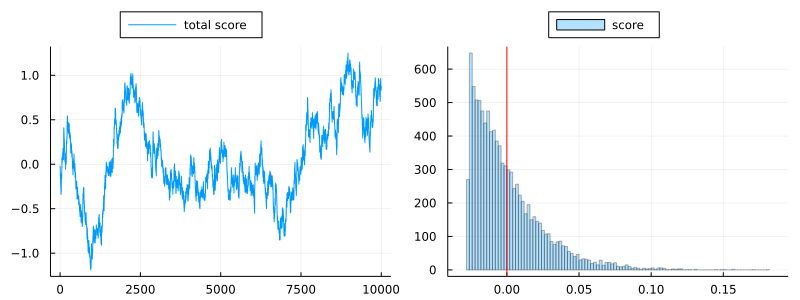

In [8]:
plot_score(; loss_func = (x, v) -> (√x - √v)^2)

mean(Score) = -0.022671429337476623
std(Score) = 0.09983230112003244


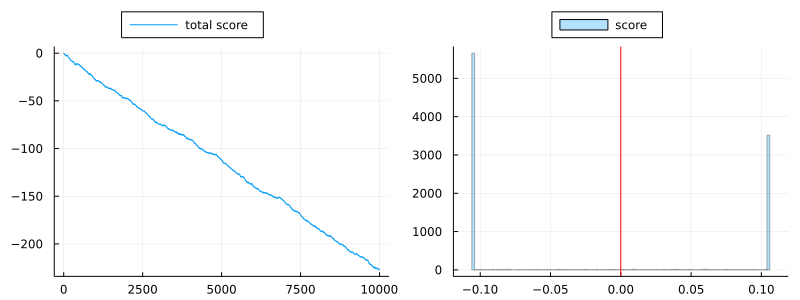

In [9]:
plot_score(; loss_func = (x, v) -> abs(log(x) - log(v)))

mean(Score) = -0.03581268293209929
std(Score) = 0.10572200465063356


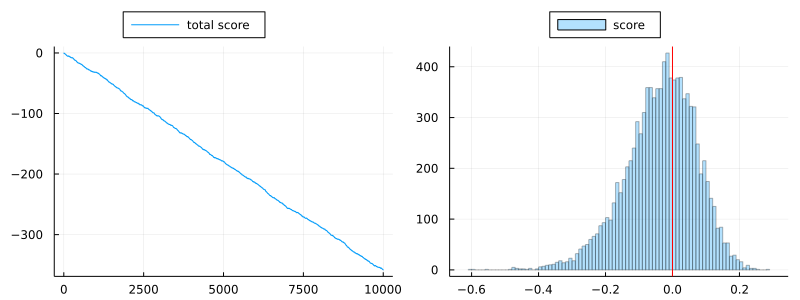

In [10]:
plot_score(; loss_func = (x, v) -> (log(x) - log(v))^2)

mean(Score) = -0.0006257160137453494
std(Score) = 0.00993167181043526


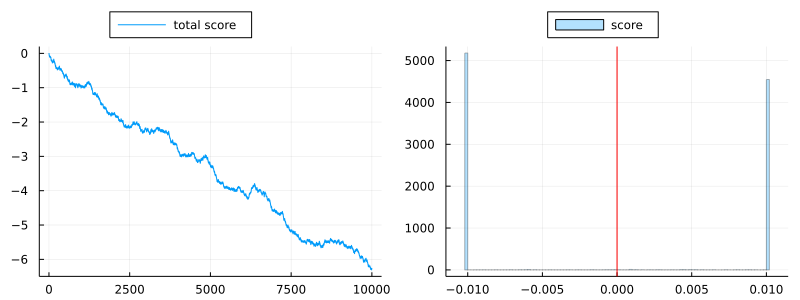

In [11]:
plot_score(; loss_func = (x, v) -> abs(log(x) - log(v)), n = 100)

mean(Score) = -0.00031644702600220313
std(Score) = 0.002897214763962847


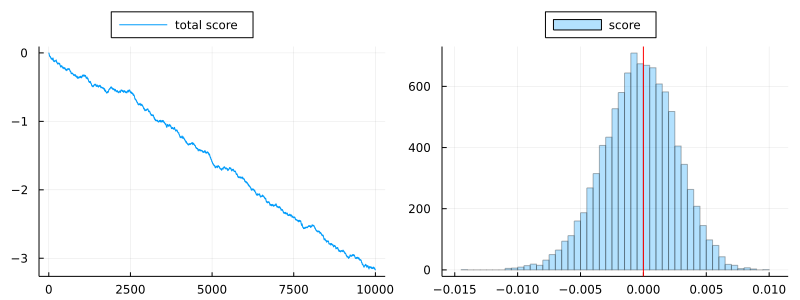

In [12]:
plot_score(; loss_func = (x, v) -> (log(x) - log(v))^2, n = 100)